In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [72]:
dfx=pd.read_csv('/Users/kaushikchaturvedula/python/KNN algo/Diabetes_XTrain.csv')
dfy=pd.read_csv('/Users/kaushikchaturvedula/python/KNN algo/Diabetes_YTrain.csv')
dfy

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [71]:
train_char=dfx.values
outcomes=dfy.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# KNN

In [46]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,query,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d=distance(query,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

# TESTING

In [81]:
dftest=pd.read_csv('/Users/kaushikchaturvedula/python/KNN algo/Diabetes_XTest.csv')
test_char=dftest.values

In [82]:
y_test=[list(knn(train_char,outcomes,i)) for i in test_char]

In [83]:
y_test=np.array(y_test)
y_test.reshape(-1,)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

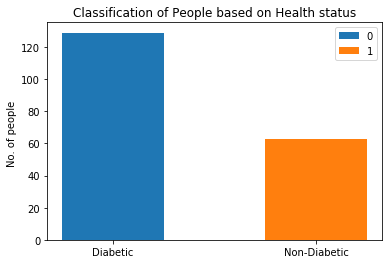

In [113]:
class0=[int(i)+1 for i in range(len(y_test)) if y_test[i]==0]
class1=[int(i)+1 for i in range(len(y_test)) if y_test[i]==1]
ind=np.arange(2)
p1 = plt.bar(ind[0],len(class0), width=0.5)
p2 = plt.bar(ind[1],len(class1),width=0.5)
plt.ylabel('No. of people ')
plt.title('Classification of People based on Health status')
plt.xticks(ind, ('Diabetic', 'Non-Diabetic'))
plt.legend((p1[0], p2[0]), ('0', '1'))
plt.show()

In [115]:
ylist=[int(i) for i in y_test]
csvout={'outcome':ylist}
df=pd.DataFrame(csvout)
df

,outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,0
189,1
190,1


In [116]:
df.to_csv(r'/Users/kaushikchaturvedula/python/KNN algo/Output.csv') 